<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/medical2.png?raw=true" width=800 align="left"/>

# 실습 내용

- 다양한 알고리즘으로 모델을 만들고 성능을 예측합니다.
- 성능이 좋을 것으로 판단된 모델의 성능을 튜닝합니다.
- 튜닝된 모델의 성능을 평가합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [135]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [136]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/insurance.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [137]:
# 데이터 살펴보기
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**데이터 설명**

- age: 나이
- sex: 성별(female, male)
- bmi: 체질량지수(체중을 키의 제곱으로 나눈 값, 적정수준:18.5 - 24.9)
- children: 자녀 수
- smoker: 흡연 여부
- region: 거주지역(northeast, southeast, southwest, northwest)
- charges: 건강보험에서 지불한 의료비 - Target

In [138]:
# 기술통계 확인
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [139]:
# target 확인
target = 'charges'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target] 


**2) 가변수화**

In [140]:
# 가변수화 대상: sex, smoker, region
dumm_cols = ['sex', 'smoker', 'region']

# 가변수화
x=pd.get_dummies(x, columns=dumm_cols, drop_first=True)

# 확인
x

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


**3) 학습용, 평가용 데이터 분리**

In [141]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

**4) 정규화**

In [142]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

# 4.성능 예측

- 여러 알고리즘으로 모델을 만들고 K-Fold CV로 성능을 예측합니다.
- 하이퍼파라미터를 설정하지 않고 진행합니다.
- 각 모델의 성능 정보를 수집해 마지막에 비교합니다.

In [143]:
# xgboost 설치
# pip install xgboost

In [144]:
# lightgbm 설치
# pip install lightgbm

- 이후 사용할 함수를 모두 불러옵니다.

In [145]:
# 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import *
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

**1) Linear Regression**

- Linear Regression 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [146]:
# 선언하기
model_dt=LinearRegression()

In [147]:
# 성능예측
cv_score = cross_val_score(model_dt, x_train, y_train, cv=10)

In [148]:
# 결과확인
print(cv_score)
print('평균 : ', cv_score.mean())

[0.68733129 0.72630945 0.82457396 0.73764922 0.71314841 0.75100487
 0.71858438 0.69926087 0.78120491 0.81257551]
평균 :  0.7451642881870868


In [149]:
# 결과수집
result= {}
result['LinearRegression'] = cv_score.mean()

**2) KNN**

- KNN 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [150]:
# 선언하기
model_dt = KNeighborsRegressor()

In [151]:
# 성능예측
cv_score = cross_val_score(model_dt, x_train_s, y_train, cv=10)

In [152]:
# 결과확인
print(cv_score)
print('평균 : ', cv_score.mean())

[0.69551237 0.69648785 0.77699225 0.72284561 0.69937007 0.70712044
 0.70168701 0.7121731  0.78219423 0.76965699]
평균 :  0.72640399198177


In [153]:
# 결과수집
result['KNN'] = cv_score.mean()

**3) Decision Tree**

- Decision Tree 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [154]:
# 선언하기
model_dt = DecisionTreeRegressor()

In [155]:
# 성능예측
cv_score = cross_val_score(model_dt, x_train, y_train, cv=10)

In [156]:
# 결과확인
print(cv_score)
print('평균 : ', cv_score.mean())

[0.72025671 0.61476577 0.71688887 0.56240574 0.56354192 0.6431938
 0.53441355 0.60621911 0.7964928  0.71262316]
평균 :  0.6470801433505905


In [157]:
# 결과수집
result['DecisionTreeRegressor'] = cv_score.mean()

In [158]:
result

{'LinearRegression': 0.7451642881870868,
 'KNN': 0.72640399198177,
 'DecisionTreeRegressor': 0.6470801433505905}

**4) SVM**

- SVM 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [159]:
# 선언하기
model_dt = SVR() # c=n을 올리면 성능 올라감

In [160]:
# 성능예측
cv_score = cross_val_score(model_dt, x_train, y_train, cv=10)

In [161]:
# 결과확인
print(cv_score)
print('평균 : ', cv_score.mean())

[-0.15247502 -0.10262806 -0.05032119 -0.15299527 -0.14316751 -0.1446866
 -0.14350999 -0.10617934 -0.11799704 -0.05735671]
평균 :  -0.11713167219956735


In [162]:
# 결과수집
result['SVR'] = cv_score.mean()

**5) Random Forest**

- Random Forest 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [163]:
# 선언하기
model_dt = RandomForestRegressor()

In [164]:
# 성능예측
cv_score = cross_val_score(model_dt, x_train, y_train, cv=10)

In [165]:
# 결과확인
print(cv_score)
print('평균 : ', cv_score.mean())

[0.79166424 0.80144859 0.89467931 0.81650739 0.78249304 0.85993452
 0.80567209 0.77460643 0.87689157 0.88715321]
평균 :  0.8291050397321639


In [166]:
# 결과수집
result['RandomForestRegressor'] = cv_score.mean()

In [167]:
result

{'LinearRegression': 0.7451642881870868,
 'KNN': 0.72640399198177,
 'DecisionTreeRegressor': 0.6470801433505905,
 'SVR': -0.11713167219956735,
 'RandomForestRegressor': 0.8291050397321639}

**6) XGBoost**

- XGBoost 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [185]:
# 선언하기
model_dt = XGBRFRegressor()

In [188]:
# 성능예측
cv_score = cross_val_score(model_dt, x_train_s, y_train, cv=5)

In [189]:
# 결과확인
print(cv_score)
print('평균 : ', cv_score.mean())

[0.82508846 0.87804793 0.82831912 0.81879567 0.8947724 ]
평균 :  0.849004717958118


In [171]:
# 결과수집
result['XGBRFRegressor'] = cv_score.mean()

**7) LightGBM**

- LightGBM 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [172]:
# 선언하기
model_dt = LGBMRegressor()

In [173]:
# 성능예측
cv_score = cross_val_score(model_dt, x_train, y_train, cv=10)

In [174]:
# 결과확인
print(cv_score)
print('평균 : ', cv_score.mean())

[0.74534728 0.81490171 0.92152347 0.83986098 0.79756831 0.84300379
 0.81038971 0.75716671 0.86711055 0.89337167]
평균 :  0.8290244192465062


In [175]:
# 결과수집
result['LGBMRegressor'] = cv_score.mean()

# 5.결과 확인

- 예측된 각 모델의 성능을 비교합니다.

In [176]:
# 성능 비교
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(3))
print('=' * 40)

LinearRegression 0.745
KNN 0.726
DecisionTreeRegressor 0.647
SVR -0.117
RandomForestRegressor 0.829
XGBRFRegressor 0.848
LGBMRegressor 0.829


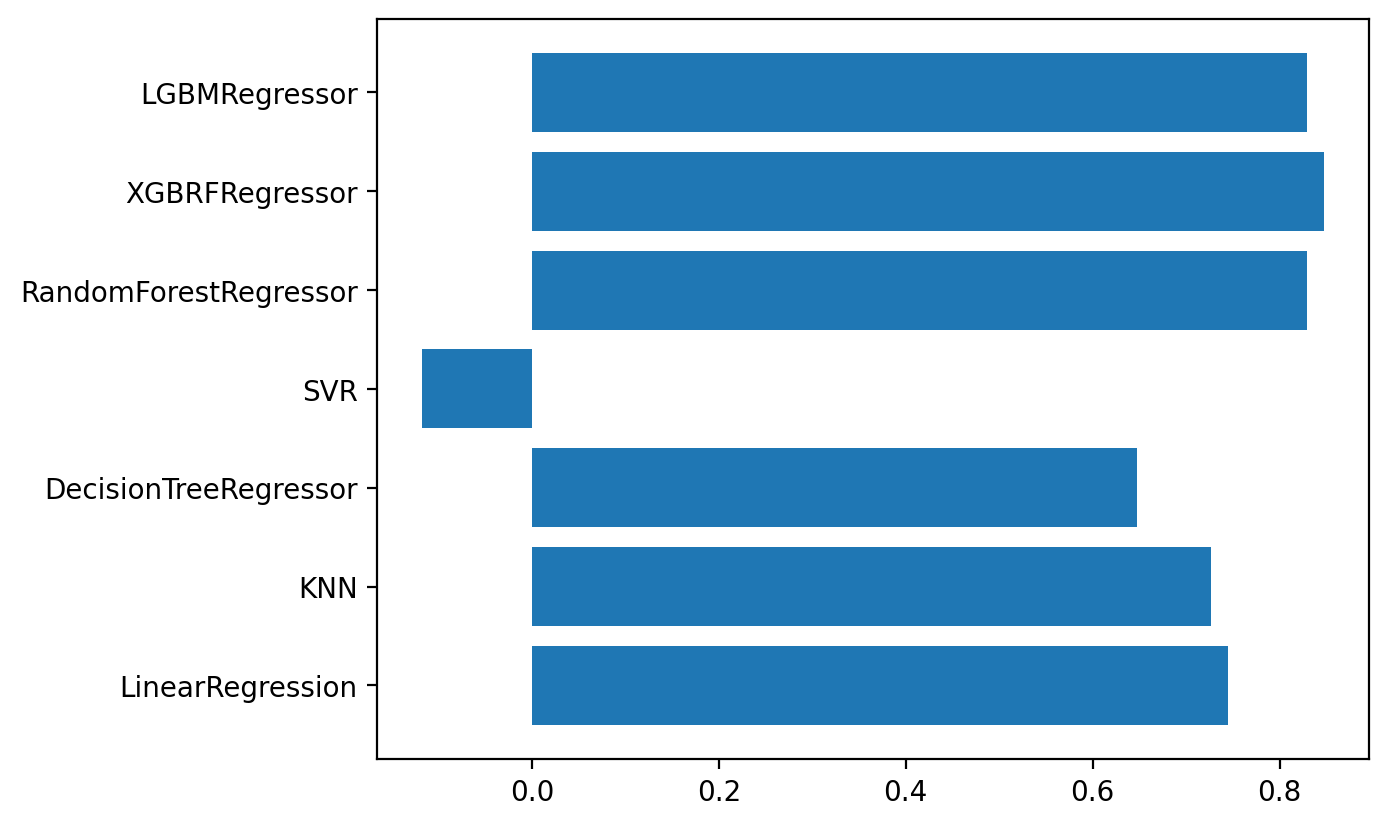

In [177]:
# 성능 시각화 비교
plt.barh(list(result.keys()), result.values())
plt.show()

# 6.성능 튜닝

- 위에서 성능이 가장 좋을 것으로 예측된 모델을 튜닝합니다.
- 본 실습에서는 Random Forest 모델 성능을 튜닝합니다.

In [178]:
# 기본 모델 선언
model_dt = RandomForestRegressor(random_state=1)

# 파라미터 지정
  # max_depth: range(1, 21)
param = {'max_depth' : range(1, 21)}

# 모델 선언
model = RandomizedSearchCV(model_dt,     # 기본모델
                           param,        # 파라미터 범위
                           cv=5,         # k-Fold CV의 폴더 개수
                           n_iter=20,    # 20개만 랜덤으로 고름, 랜덤으로 시도할 횟수
                           scoring='r2', # 사용할 평가지표
                           )




In [179]:
# 학습하기(많은 시간이 소요될 수 있음)
model.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
                   n_iter=20, param_distributions={'max_depth': range(1, 21)},
                   scoring='r2')

In [180]:
# 최적 파라미터, 예측 최고 성능
print('=' * 80)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print('최적파라미터:', model.best_params_) 
print('-' * 80)
print('최고성능:', model.best_score_)
print('=' * 80)


[0.62391439 0.82477489 0.84987367 0.85193322 0.84989698 0.84653128
 0.84200316 0.83624535 0.83156312 0.82944609 0.82807213 0.82779898
 0.82806185 0.82715381 0.82684122 0.82705669 0.82725178 0.82649406
 0.82650397 0.82652807]
--------------------------------------------------------------------------------
최적파라미터: {'max_depth': 4}
--------------------------------------------------------------------------------
최고성능: 0.8519332169168268


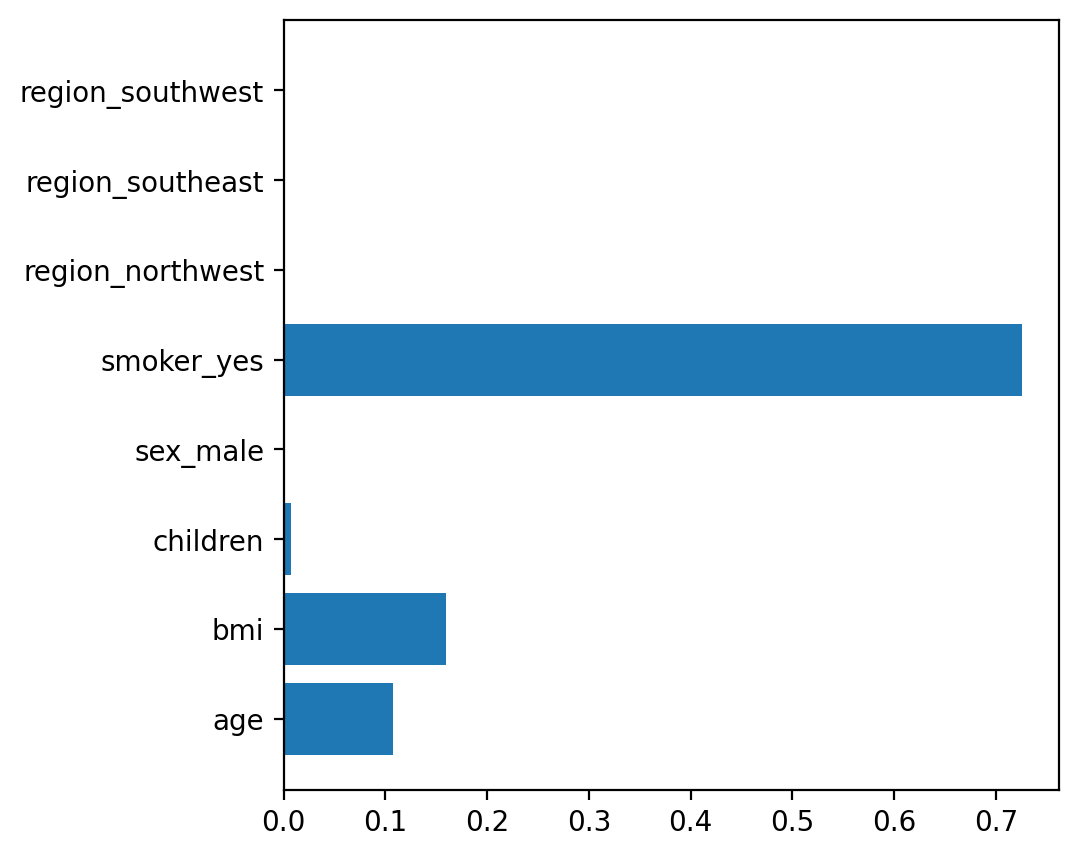

In [181]:
# 변수 중요도 시각화
plt.figure(figsize=(5, 5))
plt.barh(y=list(x), width=model.best_estimator_.feature_importances_) #시각화 할때 best_estimator_ 필수!!
plt.show()



# 7.성능 평가

- 최적 파라미터로 학습된 모델에 대해 최종 성능 평가를 진행합니다.

In [182]:
from sklearn.metrics import mean_absolute_error, r2_score

In [183]:
# 예측하기
y_pred = model.predict(x_test)

In [184]:
# 성능평가
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score:', r2_score(y_test, y_pred))


MAE: 2493.156835384944
R2-Score: 0.8560482679256518
